## Algoritmia
### Práctica 10
En esta práctica se trabaja con árboles de búsqueda óptimos y el método de programación dinámica para su obtención.

En el cuerpo de cada función o método a implementar hay una instrucción "pass", se debe sustituir por la implementación adecuada. La implementación debe ser propia, sin incluir código ajeno o realizado conjuntamente. No se debe modificar el resto del código proporcionado.

Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.

## Preámbulo
No se puede importar de otros módulos, salvo que se consulte previamente con el profesor

In [1]:
# Importaciones
import unittest
import networkx as nx
import matplotlib.pyplot as plt

## Clase `ArbolBusquedaOptimo`

In [2]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        #Asignaciones Iniciales
        self.claves=claves
        self.n=len(claves)
        #Inicializacion de unna varibale que hace la funcion de infinito.
        INF=999
        #Inicializaciones de las tablas e,w y raiz
        e=[[0 for i in range(0,self.n+1)]for j in range(0,self.n+2)]
        w=[[0 for i in range(0,self.n+1)]for j in range(0,self.n+2)]
        raiz=[[None for i in range(0,self.n+1)]for j in range(0,self.n+1)] 

        probab_claves.insert(0,0)
        
        #Se obtienen los nodos en formato numerico
        self.nodos= [ i for i in range(1, self.n+1)]
        
        #Inicializacion de las diagonales en las tablas e y w
        if probab_pseudo is not None:
            for i in range(1, self.n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        #Algoritmo para darle rellenar las 3 tablas
        for l in range(1, self.n+1):
            for i in range(1, self.n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r

        #Asignaciones Finales de las tablas.
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
            
        #Llamada a la funcion recursiva que devuelve el string
        return self.getString(clave,self.nodos)
    

    def __len__(self):
        """Número de claves en el árbol."""
        #Devuelve la longitud de claves.
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        #Devuelve si una clave está en claves
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        #Devuelve la clave i en claves
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        #Devuelve la raiz del arbol en formato kn
        return "k"+str(self.root[1][self.n])

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        #Para cuando la clave es None se obtiene la profundidad del arbol completo
        if clave == None:
            return self.profundidadArbol()
        #Se llama funcion auxiliar para obtener el nivel de profundidad
        level = self.aux_search(clave)[0][1]
                
        return level


    
    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
        #Si la clave es None, asignamos la raiz del arbol
        if clave == None:
            clave = self.raiz()
        
        #Se llama a la funcion auxiliar para obtener los hijos derechos e izquierdos de la clave objetivo
        derArr,izqArr = self.aux_search(clave)[1]
        
        #Si el target no tiene hijos en derecho e izquierdo se sacan sus respectivos padres de los sub arboles, 
        #Sino se devuelve None respectivamente.
        #Se pasa a formato string kn
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        #Se obtiene el sub arbol del objetivo
        c = self.aux_search(clave)[0][0]
        #Se devuelve el valor de la tabla e
        return self.e[min(c)][max(c)]
    
    
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()
        
    #AUXILIARES
    #NO SE USA
    def get_sons(self, root, target, nodes):
        """
        Funcion Auxiliar NO SE USA. Que saca los hijos de manera recursiva de un nodo
        siendo target1 o target2 los hijos objetivos
        """
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1
    
    def aux_search(self, clave):
        """
        Funcion Auxiliar iterativa que recorre el arbol buscando un nodo.
        Devuelve la profundidad y el sub arbol hijo donde esta el target, los hijos derechos y izquierdos.
        """
        #Se inicializa el nivel de profundidad a 0
        level= 0
        #Se obtienen los nodos en formato numerico
        c = self.nodos
        #Se obtiene el padre del arbol
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        #Obtenemos el hijo derecho y el izquierdo
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        #Se obtiene en formato numerico el nodo objetivo
        t = int(clave[1:]) 
        #Se recorre el arbol iterativamente 
        #Buscando el objetivo en los subhijos.
        while rSub != t:
            level+=1
            #Si el padre del sub arbol es mayor al objetivo
            #Obtenemos el hijo de la izquierda
            #Sino Obtenemos el hijo de la derecha
            #Y guardamos el hijo derecho e izquierdo del subArbol
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            else:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
                
        return (c,level),(derArr,izqArr)
    
    def profundidadArbol(self):
        """
        Funcion iterativa auxiliar que busca los sub hijos mas grandes para obtener la
        profundidad del arbol. Otro metodo para conseguir la profundidad total del arbol.
        """
        #Se inicializa el nivel de profundidad
        level= 0
        #Se obtienen los nodos en formato numerico
        subArbol = self.nodos
        #Se obtiene el padre y el indice en el subarbol
        rSub = self.root[min(subArbol)][max(subArbol)]
        iRSub = subArbol.index(rSub)
        #Se obtiene el hijo derecho o el izquierdo dependiendo de cual es mas grande
        subArbol = subArbol[:iRSub] if len(subArbol[:iRSub])>len(subArbol[iRSub+1:]) else subArbol[iRSub+1:]
        #Se va sumando iterativamente hasta llegar al final del arbol, eligiendo los hijos mas grandes
        #Y obteniendo los padres de los subhijos.
        while len(subArbol) != 0:
            level+=1
            rSub = self.root[min(subArbol)][max(subArbol)]
            iRSub = subArbol.index(rSub)
            subArbol = subArbol[:iRSub] if len(subArbol[:iRSub])>len(subArbol[iRSub+1:]) else subArbol[iRSub+1:]
        #Se devuelve el nivel de profundidad   
        return level
    
    def getString(self, target, nodes):
        """
        Funcion recursiva Auxiliar que devuelve el arbol representado en formato
        String.
        """
        #Devuelve valores si la longitud de los nodos es 1
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        #Devuelve None si la longitud de los nodos es 1
        if len(nodes)==0:
            return None
        #Se inicializa en la recursiones el string vacio, para devolverlo
        string=""
        #Se obtiene la raiz del nuevo sub arbol y su indice en nodes.
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        #Obtenemos los nodos que se van de hijos a la derecha y a la izquierda
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        
        #Llamadas recursivas
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        
        return string

### Dibujo de los árboles

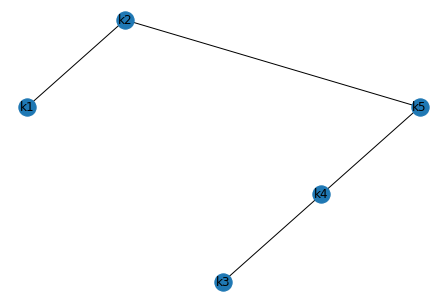

In [3]:
arbol = ArbolBusquedaOptimo(
    ["k1", "k2", "k3", "k4", "k5"], 
    [0.15, 0.10, 0.05, 0.10, 0.20], 
    [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])

arbol.dibuja()

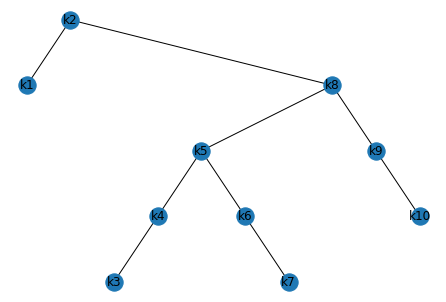

In [4]:
arbol = ArbolBusquedaOptimo(
    ["k" + str(i) for i in range(1, 11)], 
    [0.21, 0.2, 0.04, 0.06, 0.08, 0.04, 0.04, 0.11, 0.19, 0.03])   

arbol.dibuja()

### Tests para la clase `ArbolBusquedaOptimo`

In [5]:
class TestArbolBusquedaOptimo(unittest.TestCase):
    """Tests para la clase ArbolBusquedaOptimo"""
    
    def test_arbol_busqueda_1(self):
        """Tests para la clase ArbolBusquedaOptimo"""
        
        claves = ["k1", "k2", "k3", "k4", "k5"]
        arbol = ArbolBusquedaOptimo(
            claves, [0.15, 0.10, 0.05, 0.10, 0.20], 
            [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])
       
        self.assertEqual(len(arbol), 5)
                              
        for clave in claves:
            self.assertTrue(clave in arbol)
        self.assertTrue("k0" not in arbol)
        self.assertTrue("k6" not in arbol)
        
        for i, clave in enumerate(claves):
            self.assertEqual(arbol[i], clave)
        
        for i, clave in enumerate(arbol):
            self.assertEqual(claves[i], clave)
            
        self.assertEqual(arbol.raiz(), "k2")
        
        self.assertEqual(arbol.profundidad(), 3)
        profundidades = [1, 0, 3, 2, 1]
        for clave, profundidad in zip(claves, profundidades):
            self.assertEqual(arbol.profundidad(clave), profundidad)
            
        lista_hijos = [(None, None), ("k1", "k5"), (None, None), ("k3", None), 
                 ("k4", None)]
        for clave, hijos in zip(claves, lista_hijos):
            self.assertEqual(arbol.hijos(clave), hijos)
            
        self.assertEqual(round(arbol.coste_esperado(), 2), 2.75)
        costes = [ 0.45, 2.75, 0.25, 0.60, 1.30]
        for clave, coste in zip(claves, costes):
            self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
            
        self.assertEqual(str(arbol), "((k1)k2(((k3)k4)k5))")
        
    def test_arbol_busqueda_2(self):
        """Tests para la clase ArbolBusquedaOptimo"""
        
        claves = ["k" + str(i) for i in range(1, 11)]
        arbol = ArbolBusquedaOptimo(
            claves, 
            [0.21, 0.2, 0.04, 0.06, 0.08, 0.04, 0.04, 0.11, 0.19, 0.03])
    
        self.assertEqual(len(arbol), 10)
                              
        for clave in claves:
            assert clave in arbol
        assert "k0" not in arbol
        assert "k11" not in arbol
        
        for i, clave in enumerate(claves):
            self.assertEqual(arbol[i], clave)
        
        for i, clave in enumerate(arbol):
            self.assertEqual(claves[i], clave)
            
        self.assertEqual(arbol.raiz(), "k2")
        
        self.assertEqual(arbol.profundidad(), 4)
        profundidades = [1, 0, 4, 3, 2, 3, 4, 1, 2, 3]
        for clave, profundidad in zip(claves, profundidades):
            self.assertEqual(arbol.profundidad(clave), profundidad)
        
        lista_hijos = [(None, None), ('k1', 'k8'), (None, None), ('k3', None), 
                       ('k4', 'k6'), (None, 'k7'), (None, None), ('k5', 'k9'), 
                       (None, 'k10'), (None, None)]
        for clave, hijos in zip(claves, lista_hijos):
            self.assertEqual(arbol.hijos(clave), hijos)
            
        self.assertEqual(round(arbol.coste_esperado(), 2), 2.57)
        costes = [0.21, 2.57, 0.04, 0.14, 0.52, 0.12, 0.04, 1.36, 0.25, 0.03]
        for clave, coste in zip(claves, costes):
            self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
    
        self.assertEqual(str(arbol), "((k1)k2((((k3)k4)k5(k6(k7)))k8(k9(k10))))")        

## Ejecución de tests

In [6]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK
